In [39]:
from numpy import *
import operator

In [40]:
def createDataSet():
    group = array([[1.0, 1.1],
                  [1.0, 1.0],
                  [0, 0],
                  [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [41]:
group, labels = createDataSet()

In [42]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [43]:
labels

['A', 'A', 'B', 'B']

In [44]:
def classify0(inX, dataSet, labels, k):
    dataSetsize = dataSet.shape[0]
    # 计算距离
#     https://blog.csdn.net/ksearch/article/details/21388985  python系列】numpy中的tile函数
    diffMat = tile(inX, (dataSetsize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()

    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(),
                               key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [45]:
classify0([0, 0], group, labels, 3)

'B'

In [46]:
# 将文本记录转换成numpy的解析程序
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0

    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index+=1
    
    return returnMat,classLabelVector 

In [47]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

In [48]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [49]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

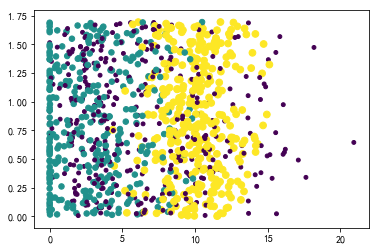

In [50]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2],
          15 * array(datingLabels), 15 * array(datingLabels))
plt.show()

In [51]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [52]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [53]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [54]:
# 分类器针对约会网站的测试代码
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        print('the classifier came back with: %d, the real answer is: %d' % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))        

In [55]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [56]:
# 使用算法　构建完成可用的系统
# 分类器针对约会网站的测试代码
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input('percentage of time spent playing video games?'))
    ffMiles = float(input('frequent filer miles earned per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels, 3)
    print("you will probably like this person: %s"% (resultList[classifierResult - 1]))

In [57]:
# classifyPerson()

In [58]:
# 手写识别系统
def img2Vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect        

In [59]:
testVector = img2Vector('digits/testDigits/0_13.txt')

In [61]:
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
# 手写数字识别系统测试代码

In [64]:
from os import listdir

def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('digits/trainingDigits/')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2Vector('digits/trainingDigits/%s' % (fileNameStr))
    
    testFileList = listdir('digits/testDigits/')
    errorCount = 0.0
    mTest = len(testFileList)
    
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2Vector('digits/testDigits/%s' % (fileNameStr))
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)) 
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [65]:
handwritingClassTest()

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answe

the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 0, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 1, the real answe

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answe

the classifier came back with: 7, the real answer is: 7
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answe

the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 0, the real answe